In [13]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys  
sys.path.insert(0, '/home/HPC/camontan/turchetti_paper/')

from clustering_scripts import *

In [2]:
EXTENT = (0, 0.45, 0, 0.45)

In [3]:
f_stab = h5py.File("/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_stability_stability.h5", "r")

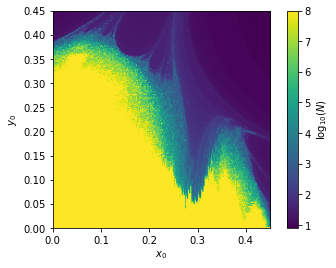

In [4]:
data = f_stab["stability"][:]
# plot the data
plt.imshow(np.log10(data.reshape(200, 200)), origin="lower", extent=EXTENT)
plt.xlabel("$x_0$")
plt.ylabel("$y_0$")
plt.colorbar(label="$\\log_{10}(N)$")

In [5]:
data = f_stab["stability"][:]
mask = np.log10(data)==8

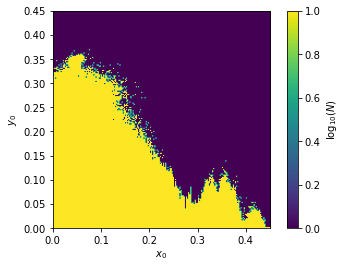

In [6]:
plt.imshow(mask.reshape(200, 200), origin="lower", extent=EXTENT)
plt.xlabel("$x_0$")
plt.ylabel("$y_0$")
plt.colorbar(label="$\\log_{10}(N)$")

In [7]:
f = h5py.File("/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_tangent_map_tangent_stuff.h5", "r")

In [38]:
ground_truth_data = f['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

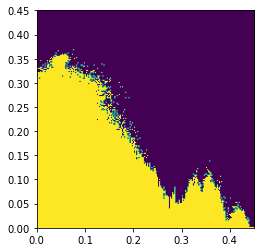

In [41]:
plt.imshow(mask.reshape(200, 200), origin="lower", extent=EXTENT)

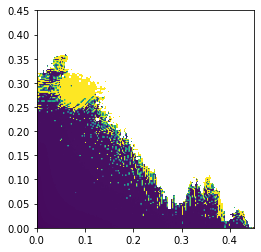

In [42]:
plt.imshow(ground_truth_data.reshape(200, 200), origin="lower", extent=EXTENT)

In [43]:
gt_thesh = find_threshold(np.log10(ground_truth_data))
ground_truth = np.log10(ground_truth_data) > gt_thesh

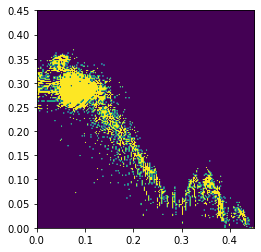

In [44]:
plt.imshow(ground_truth.reshape(200, 200), origin="lower", extent=EXTENT)

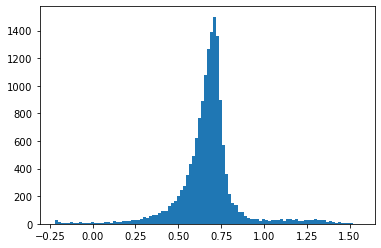

In [40]:
plt.hist(np.log10(data[mask]), bins=100);

In [30]:
data = f['10000/lyapunov_error'][:]
data[np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
data[mask & (np.isnan(data))] = np.nanmax(data[~np.isinf(data)])
data[~mask] = np.nan
data = np.log10(data)

In [45]:
thesh = find_threshold(np.log10(data))
guess = np.log10(data) > thesh

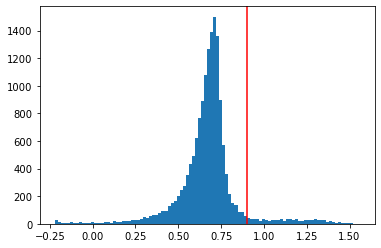

In [46]:
plt.hist(np.log10(data[mask]), bins=100)
plt.axvline(thesh, color="red")

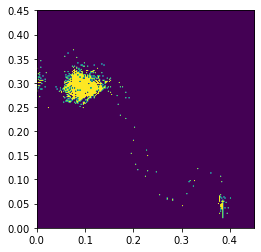

In [47]:
plt.imshow(guess.reshape(200, 200), origin="lower", extent=EXTENT)

In [48]:
classify_data(ground_truth[mask], guess[mask])

{'total': 15684,
 'true_positive': 856,
 'true_negative': 12274,
 'false_positive': 2,
 'false_negative': 2552,
 'accuracy': 0.8371588880387656,
 'precision': 0.9976689976689976,
 'recall': 0.2511737089201878,
 'f1': 0.40131270511017353}

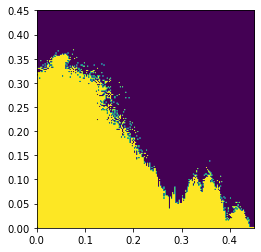

In [36]:
plt.imshow(ground_truth.reshape(200, 200), origin="lower", extent=EXTENT)

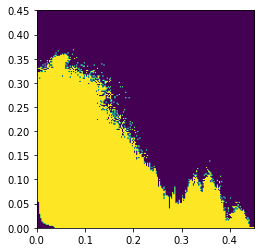

In [37]:
plt.imshow(guess.reshape(200, 200), origin="lower", extent=EXTENT)

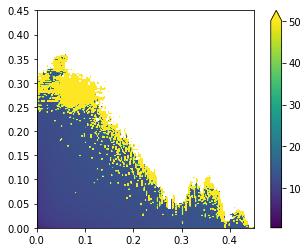

In [12]:
plt.imshow(
    np.log10(data.reshape(200, 200)),
    origin='lower',
    extent=EXTENT,
    vmax=50)

plt.colorbar(extend='max')

In [89]:
times = []
values = []
for k in f:
    times.append(int(k))
    values.append(f[k]['lyapunov_error'][:])

# sort the times along with the values
times, values = zip(*sorted(zip(times, values)))

times = np.array(times)
values = np.array(values)


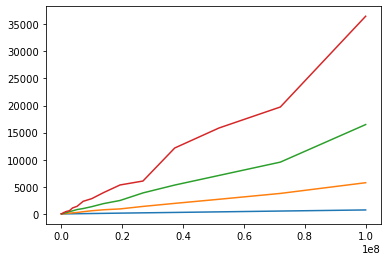

In [64]:
plt.plot(times, values[:, 5412]/times)
plt.plot(times, values[:, 5432]/times)
plt.plot(times, values[:, 5452]/times)
plt.plot(times, values[:, 5472]/times)
# plt.plot(times, values[:, 5482]/times)
# plt.plot(times, values[:, 5492]/times)

#plt.xscale('log')
# plt.yscale('log')

In [72]:
final_lyap = f['100000000/lyapunov_error'][:]
np.where(np.logical_and(mask.flatten(), np.isnan(final_lyap)))

(array([  172,   197,   199, ..., 32017, 32028, 32633]),)

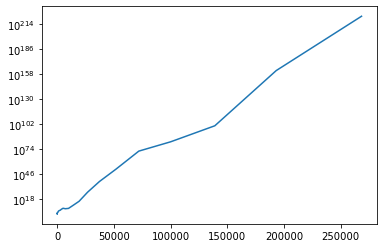

In [90]:
plt.plot(times, values[:, 32017])
plt.yscale("log")


In [75]:
values[:, 32017]

array([2.43875242e+001, 2.02917504e+001, 2.85787942e+001, 3.60044324e+001,
       2.96769469e+001, 7.28457318e+001, 4.66846149e+001, 1.93235109e+002,
       2.56356957e+002, 2.59094498e+002, 7.44603493e+002, 9.70275435e+002,
       9.94907020e+002, 1.87488176e+003, 1.50664031e+004, 4.48519551e+004,
       1.18956957e+005, 2.72023788e+005, 3.27412729e+006, 4.32722963e+007,
       1.31767197e+007, 3.05935021e+007, 5.86878625e+010, 2.77942509e+015,
       4.44477297e+025, 4.10648835e+037, 2.61679078e+051, 4.68350182e+071,
       1.26026908e+082, 1.12912136e+100, 7.98122022e+161, 6.09663846e+222,
                   inf,             inf,             inf,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan])